In [31]:
# Write a function LinearSpline(points) that returns the list [LS1(x), LS2(x), . . . , LSn(x)] where LSi(x) is the
# piece of the linear spline function LS(x) interpolating points on the interval [xi−1, xi]
def LinearSpline(points):
    # create array to hold results
    results = []
    # for each point in the list find the linear spline polynomial
    for i in range(len(points)):
        # the first point does not have a linear spline polynomial
        if i == 0:
            continue
        else:
            # create a linear spline polynomial
            LS = points[i-1][1]*(x-points[i][0])/(points[i-1][0]-points[i][0]) + points[i][1]*(x-points[i-1][0])/(points[i][0]-points[i-1][0])
            # append the linear spline polynomial to the result array
        results.append(LS)
    # return the result array if something goes wrong
    return results


points = [[2, 1], [4, 2], [8, 3]]
print("Linear Spline: ", LinearSpline(points))



Linear Spline:  [1/2*x, 1/4*x + 1]


In [44]:
# Write a function NaturalQuadraticSpline(points) that returns the list [QS1(x), QS2(x), . . . , QSn(x)] where
# QSi(x) is the piece of the natural quadratic spline function QS(x) interpolating points on the interval [xi−1, xi]

def NaturalQuadraticSpline(points):
    # create array to hold results
    results = []
    ZiValues = [0, ]
    previousZi = 0
    # determine the Zi values assuming the first point is 0
    for i in range(1, len(points)):
        zi = 2*((points[i][1] - points[i - 1][1]) / points[i][0] - points[i - 1][0]) - previousZi
        ZiValues.append(zi)
    # with the Zi values determine the quadratic spline polynomial
    for i in range(len(points)):
        # the first point does not have a quadratic spline polynomial
        if i == 0:
            continue
        else:
            # create a quadratic spline polynomial
            QS = ((ZiValues[i] - ZiValues[i - 1]) / 2 * (points[i][0] - points[i - 1][0])) * (x - points[i - 1][0])^2 + ZiValues[i - 1] * (x - points[i - 1][0]) + points[i - 1][1]
            # print each variable in the quadratic spline polynomial
            # append the quadratic spline polynomial to the result array
            results.append(QS)
    # return the results
    return results

points = [[2, 1], [4, 2], [8, 3]]
print("Quadratic Spline: ", NaturalQuadraticSpline(points))

Quadratic Spline:  [-7/2*(x - 2)^2 + 1, -17/2*(x - 4)^2 - 7/2*x + 16]


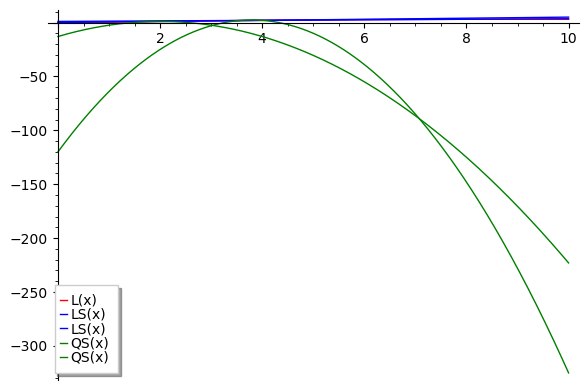

In [45]:
# Use your functions above and your LagrangeInterpolation function from Assignment 2 to plot L(x), LS(x),
# and QS(x) that interpolate the points from Example 1 on worksheet 6.2 together (in different colours).

def LagrangeInterpolation(points):
    #function body goes here
    result = 0
    subResult = 0
    for i in range (len(points)):
        Li = 1
        if i < 0:
            raise ValueError("i must be a non-negative integer")
        # ensure points is a list of 2-element lists
        if not isinstance(points, list):
            raise ValueError("points must be a list")
        # go through the largrange formula
        for j in range(len(points)):
            if j != i:
                Li *= ((x - points[j][0]) /(points[i][0] - points[j][0]))
        subResult = Li * points[i][1]
        result += subResult
    result = result.expand()
    return result

points = [[2, 1], [4, 2], [8, 3]]
# plot the lagrange interpolation 
myPlot = plot(LagrangeInterpolation(points), (x, 0, 10),  color = 'red' , legend_label = 'L(x)')
# plot the linear spline
myPlot += plot(LinearSpline(points), (x, 0, 10), color = 'blue', legend_label = 'LS(x)')
# plot the quadratic spline
myPlot += plot(NaturalQuadraticSpline(points),  (x, 0, 10), color = 'green', legend_label = 'QS(x)')
# plot all three functions together
myPlot.show()
